# Demo

In [1]:
import pytacs.recipe as rc

# 1. Load and prep data

In [2]:
ref = rc.read_h5ad('h5ad/snRNA_mouse_demo.h5ad')
ref

AnnData object with n_obs × n_vars = 2000 × 769
    obs: 'cell_type'

In [3]:
rc.prepare_ref(ref)

Check ref.X types.
type(ref.X)=<class 'scipy.sparse._csr.csr_matrix'>. Pass.
ref.X.dtype=dtype('int64')
Check ref.obs[] cell_type column.
Reinit indices.


In [4]:
clf = rc.prepare_clf(ref)

In [5]:
trx = rc.read_h5ad('h5ad/spRNA_mouse_demo.h5ad')
trx

AnnData object with n_obs × n_vars = 6556 × 5227
    obs: 'x', 'y', 'old_index'
    obsm: 'spatial'

In [6]:
rc.prepare_trx(trx)

Check trx.X types.
type(trx.X)=<class 'scipy.sparse._csr.csr_matrix'>. Pass.
trx.X.dtype=dtype('int64')
Check trx.obsm[] spatial coordinates.
Preview: trx.obsm['spatial'][:5]=array([[0, 0],
       [0, 1],
       [0, 3],
       [0, 4],
       [0, 5]])
Reinit indices.


# 2. Process data

In [7]:
# If too sparse, use rc.prepare_bin() first.
rc.prepare_graph(trx)

Loading spatial coordinates from .obsm["spatial"]..
Building spatial distances, might take up large memory..
Saved in .obsp["spatial_distances"]. Related param saved in .uns["max_spatial_distance"]


In [8]:
rc.run_annotate(trx, clf)

Constructing spatial graph..
Trying to load from cache .obsp["spatial_distances"]..
Building neighborhoods..
Building random-walk boundaries..
Aggregating spots within topology_nbhd_radius=1.5..
Building spot-wise profiles..
Performing truncated PCA (n_pcs=30)..
Getting defined embeddings..
Computing topology graph..
Skip the first round of classification for single spots.


Random walk..: 100%|██████████| 1/1 [00:00<00:00, 19.71it/s]
Pruning off nodes: 100%|█| 6556/6556 [00:00<00:00, 52094.07i


Classifying..


Gather iter 1 results: 100%|█| 6556/6556 [00:00<00:00, 23858


Ave conf: 70.07%
counter_celltypes={'PT': 159, 'Other': 2407}
counter_celltypes_global={'PT': 159, 'Other': 2407}


Random walk..: 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]
Pruning off nodes: 100%|█| 6556/6556 [00:00<00:00, 46616.49i


Classifying..


Gather iter 2 results: 100%|█| 3990/3990 [00:00<00:00, 88140


Ave conf: 64.23%
counter_celltypes={'Other': 372, 'PT': 24}
counter_celltypes_global={'PT': 183, 'Other': 2779}


Random walk..: 100%|██████████| 1/1 [00:00<00:00, 10.58it/s]
Pruning off nodes: 100%|█| 6556/6556 [00:00<00:00, 47739.00i


Classifying..


Gather iter 3 results: 100%|█| 3594/3594 [00:00<00:00, 59168


Ave conf: 62.56%
counter_celltypes={'Other': 32, 'PT': 4}
counter_celltypes_global={'PT': 187, 'Other': 2811}


Random walk..: 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]
Pruning off nodes: 100%|█| 6556/6556 [00:00<00:00, 48209.29i


Classifying..


Gather iter 4 results: 100%|█| 3558/3558 [00:00<00:00, 59266


Ave conf: 62.45%
counter_celltypes={'Other': 29, 'PT': 1}
counter_celltypes_global={'PT': 188, 'Other': 2840}


Random walk..: 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]
Pruning off nodes: 100%|█| 6556/6556 [00:00<00:00, 56355.69i


In [9]:
rc.run_segment(trx)

Estimating chunk config..
Total 42 chunks.
Chunks ready. Allocating jobs..
Running jobs..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatial distances..
Loading spatia

Finding cells: 100%|████| 154/154 [00:00<00:00, 1439.48it/s]


Gathering and sorting results..


Remapping cellmasks: 100%|█| 42/42 [00:00<00:00, 1561.38it/s

Done.


# 3, (Optional) Get cell-level AnnData

In [10]:
cells = rc.get_cells(trx)
cells

Allocating 20 jobs..


Aggregating spots: 100%|█| 133/133 [00:00<00:00, 958.18it/s]


Gathering results..
Done.


/home/liuxd/miniconda3/envs/bio-py312/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 2357 × 5227
    obs: 'cell_id_detach', 'cell_type_detach'
    obsm: 'spatial'

# Illustration

In [20]:
trx.obs[['cell_type_detach', 'cell_size_detach', 'cell_id_detach']]

,cell_type_detach,cell_size_detach,cell_id_detach
0,Undefined,9,0
1,Undefined,9,0
2,Undefined,9,0
3,Undefined,9,6
4,PT,3,153
...,...,...,...
6551,Undefined,9,6486
6552,Undefined,9,6488
6553,Other,3,6553
6554,Undefined,9,6488


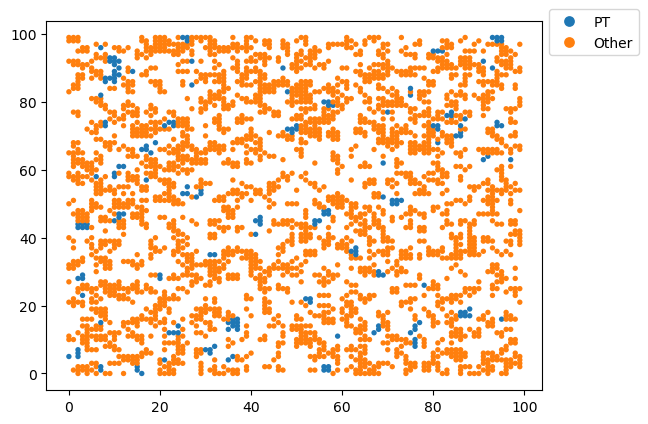

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
whr_def = trx.obs['cell_type_detach']!='Undefined'

sns.scatterplot(
    x=trx[whr_def].obsm['spatial'][:,0],
    y=trx[whr_def].obsm['spatial'][:,1],
    s=15,
    edgecolor='none',
    hue=trx.obs.loc[whr_def,'cell_type_detach'],
)
plt.legend(bbox_to_anchor=(1,1.05), loc='upper left', markerscale=2)
plt.show()